In [1]:
# python librairies installation
%pip install split-folders matplotlib opencv-python spicy

Note: you may need to restart the kernel to use updated packages.


In [2]:
# display, transform, read, split ...
import numpy as np
import cv2 as cv
import os
import splitfolders
import matplotlib.pyplot as plt

# tensorflow
import tensorflow.keras as keras
import tensorflow as tf

# image processing
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img

# model / neural network
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input

2024-03-11 16:39:30.067963: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-03-11 16:39:30.146073: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-11 16:39:30.146112: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-11 16:39:30.147823: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-11 16:39:30.160193: I tensorflow/core/platform/cpu_feature_guar

In [3]:
datagen = ImageDataGenerator()

In [4]:
# define classes name
class_names = ['a', 'c', 'f', 'h', 'j', 'm', 'p', 's', 't', 'y']

In [5]:
train_generator = datagen.flow_from_directory(
    directory="/workspace/steven/EEG2Image/data/charimages/train",
    target_size=(224, 224),
    batch_size=32,
    class_mode="sparse", 
)

Found 6090 images belonging to 10 classes.


In [6]:
valid_generator = datagen.flow_from_directory(
    directory="/workspace/steven/EEG2Image/data/charimages/val",
    target_size=(224, 224),
    batch_size=32,
    class_mode="sparse",  
)

Found 2030 images belonging to 10 classes.


In [7]:
test_generator = datagen.flow_from_directory(
    directory="/workspace/steven/EEG2Image/data/charimages/test", 
    target_size=(224, 224),
    batch_size=32,
    class_mode="sparse",  
)

Found 2030 images belonging to 10 classes.


In [8]:
# ResNet50 model
resnet_50 = ResNet50(include_top=False, weights='imagenet', input_shape=(224,224,3))
for layer in resnet_50.layers:
    layer.trainable = False

2024-03-11 16:39:43.037663: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1929] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 46689 MB memory:  -> device: 0, name: NVIDIA RTX A6000, pci bus id: 0000:1b:00.0, compute capability: 8.6


In [9]:
# build the entire model
x = resnet_50.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(512, activation='relu')(x) 
x = layers.Dropout(0.5)(x)
x = layers.Dense(256, activation='relu')(x) 
x = layers.Dropout(0.5)(x)
x = layers.Dense(128, activation='relu')(x) 
x = layers.Dropout(0.5)(x)
x = layers.Dense(64, activation='relu')(x) 
x = layers.Dropout(0.5)(x)

predictions = layers.Dense(len(class_names), activation='softmax')(x)  # Replace `num_classes` with your actual number of classes
model = Model(inputs = resnet_50.input, outputs = predictions)

In [10]:
# Create and configure the optimizer with a lower learning rate
from tensorflow.keras.optimizers import Adam

optimizer = Adam(learning_rate=0.0001)

In [11]:
def trainModel(model, epochs, optimizer):
    batch_size = 32
    model.compile(optimizer=optimizer, loss="sparse_categorical_crossentropy", metrics=["accuracy"])
    return model.fit(train_generator, validation_data=valid_generator, epochs=epochs, batch_size=batch_size)

In [12]:
#  Now, launch the training with the configured optimizer
model_history = trainModel(model=model, epochs=10, optimizer=optimizer)

Epoch 1/10


2024-03-11 16:39:50.827789: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8904
2024-03-11 16:39:53.563820: I external/local_xla/xla/service/service.cc:168] XLA service 0x7fde2e238500 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-03-11 16:39:53.563846: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA RTX A6000, Compute Capability 8.6
2024-03-11 16:39:53.568430: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1710175193.736650   37712 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


191/191 [==============================] - 37s 143ms/step - loss: 2.5316 - accuracy: 0.1263 - val_loss: 2.1316 - val_accuracy: 0.4507
Epoch 2/10
191/191 [==============================] - 22s 117ms/step - loss: 2.1401 - accuracy: 0.2149 - val_loss: 1.8619 - val_accuracy: 0.5724
Epoch 3/10
191/191 [==============================] - 21s 112ms/step - loss: 1.8813 - accuracy: 0.3118 - val_loss: 1.5082 - val_accuracy: 0.7010
Epoch 4/10
191/191 [==============================] - 20s 105ms/step - loss: 1.6004 - accuracy: 0.4282 - val_loss: 1.1480 - val_accuracy: 0.7360
Epoch 5/10
191/191 [==============================] - 21s 108ms/step - loss: 1.3284 - accuracy: 0.5312 - val_loss: 0.8747 - val_accuracy: 0.8118
Epoch 6/10
191/191 [==============================] - 22s 116ms/step - loss: 1.0858 - accuracy: 0.6192 - val_loss: 0.6914 - val_accuracy: 0.8404
Epoch 7/10
191/191 [==============================] - 22s 117ms/step - loss: 0.9096 - accuracy: 0.6872 - val_loss: 0.5786 - val_accuracy: 0.8

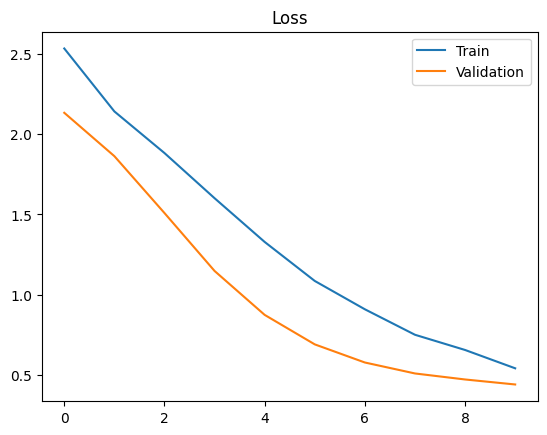

In [13]:
loss_train_curve = model_history.history["loss"]
loss_val_curve = model_history.history["val_loss"]
plt.plot(loss_train_curve, label = "Train")
plt.plot(loss_val_curve, label = "Validation")
plt.legend(loc = 'upper right')
plt.title("Loss")
plt.show()

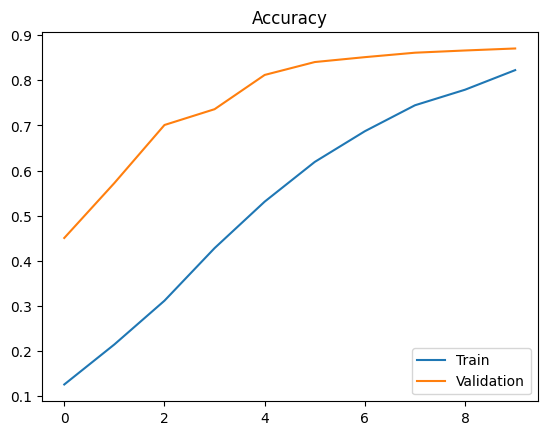

In [14]:
acc_train_curve = model_history.history["accuracy"]
acc_val_curve = model_history.history["val_accuracy"]
plt.plot(acc_train_curve, label = "Train")
plt.plot(acc_val_curve, label = "Validation")
plt.legend(loc = 'lower right')
plt.title("Accuracy")
plt.show()

In [15]:
test_loss, test_acc = model.evaluate(test_generator)
print("The test loss is: ", test_loss)
print("The best accuracy is: ", test_acc*100)

64/64 [==============================] - 6s 88ms/step - loss: 0.4040 - accuracy: 0.8901
The test loss is:  0.40404605865478516
The best accuracy is:  89.01478052139282


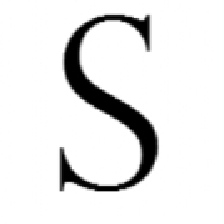

In [16]:
img = tf.keras.preprocessing.image.load_img('/workspace/steven/EEG2Image/data/charimages/s.png', target_size=(224, 224))
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = np.array([img_array]) 
img

In [17]:
# generate predictions for samples
predictions = model.predict(img_array)
print(predictions)

1/1 [==============================] - 1s 1s/step
[[5.3659454e-04 4.5640427e-03 1.1554585e-03 1.6902482e-04 8.0322670e-03
  1.1632743e-03 3.3005516e-03 9.7739774e-01 3.7102273e-04 3.3100003e-03]]


In [18]:
# generate argmax for predictions
class_id = np.argmax(predictions, axis = 1)
print(class_id)

[7]


In [19]:
# transform classes number into classes name
class_names[class_id.item()]

's'

In [20]:
model.save('/workspace/saved_model/my_model')

INFO:tensorflow:Assets written to: /workspace/saved_model/my_model/assets


INFO:tensorflow:Assets written to: /workspace/saved_model/my_model/assets


In [21]:
# my_model directory
%ls /workspace/saved_model/

my_model/


In [22]:
# contains an assets folder, saved_model.pb, and variables folder
%ls /workspace/saved_model/my_model

assets/  fingerprint.pb  keras_metadata.pb  saved_model.pb  variables/


In [23]:
model = tf.keras.models.load_model('/workspace/saved_model/my_model')
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                          

## Conclusion

**Transfer Learning** saves time by achieving better performance in fewer epochs. 

Train and test this model on your own dataset !